<a href="https://colab.research.google.com/github/NanThanThanSoe/OfflineHandwrittenRecognition/blob/master/MLHW3Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 [2 points]

Develop deep learning models using convolution neural network to classify the 10-digit handwritten MNIST dataset. You should develop at least two models and compare its performance.

- Datasource: http://yann.lecun.com/exdb/mnist/

In [0]:
pip install -U keras

     |████████████████████████████████| 378kB 2.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Conv2D
from tensorflow.keras.layers import Conv3D
import pandas as pd
import keras
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.layers import BatchNormalization
from keras import models
from keras import layers
from keras.optimizers import RMSprop
import tensorflow as tf

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


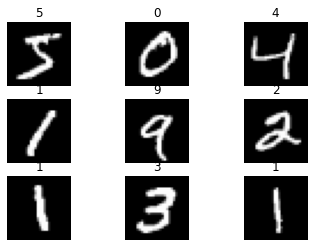

In [0]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.title(y_train[i])
  plt.axis('off')
plt.show()   

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

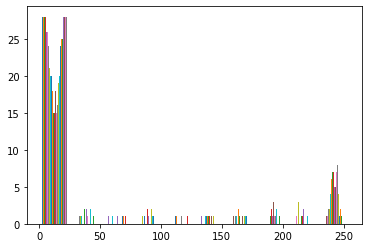

In [0]:
plt.hist(X_train[0])

In [0]:
# 28*28 images to 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

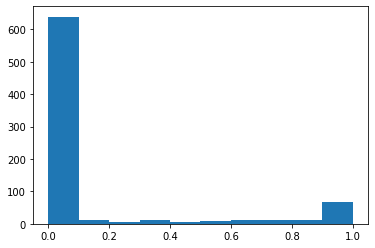

In [0]:
X_train = X_train / 255
X_test = X_test / 255
plt.hist(X_train[0])

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
num_classes = y_test.shape[1]
print (y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


First convolutional neural network

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 10)        170       
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add( layers.Flatten() )
model.add( layers.Dense(100, activation='relu') )
model.add( layers.Dense(10, activation='softmax') )

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
flatten_1 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               625100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 626,280
Trainable params: 626,280
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [0]:
kx_train = X_train.reshape(len(X_train),28,28,1)
kx_test = X_test.reshape(len(X_test),28,28,1)

In [0]:
kx_test.shape

(10000, 28, 28, 1)

In [0]:
history = model.fit(kx_train, y_train, validation_data=(kx_test,y_test), batch_size=50, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.1718 - acc: 0.9473 - val_loss: 0.0650 - val_acc: 0.9788
Epoch 2/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0574 - acc: 0.9827 - val_loss: 0.0537 - val_acc: 0.9828
Epoch 3/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.0385 - acc: 0.9883 - val_loss: 0.0479 - val_acc: 0.9845
Epoch 4/10
60000/60000 [==============================] - 24s 392us/step - loss: 0.0271 - acc: 0.9921 - val_loss: 0.0471 - val_acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 24s 392us/step - loss: 0.0187 - acc: 0.9946 - val_loss: 0.0540 - val_acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0141 - acc: 0.9961 - val_loss: 0.0511 - val_acc: 0.9849
Epoch 7/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0098 - acc: 0.9972 - val_loss: 0.

In [0]:
def plot_accuracy(history, miny=None):
  acc = history.history['acc']
  test_acc = history.history['val_acc']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy') 
  plt.figure()


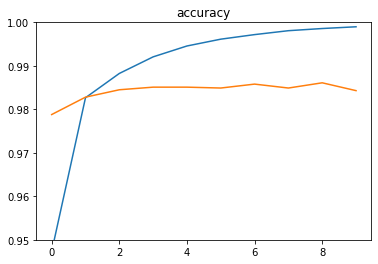

<Figure size 432x288 with 0 Axes>

In [0]:
plot_accuracy(history, miny=0.95)

Second convolutional neural network

In [0]:
model_do = models.Sequential()
model_do.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model_do.add( layers.Flatten() )
model_do.add( layers.Dropout(rate=0.5) )
model_do.add( layers.Dense(100, activation='relu') )
model_do.add( layers.Dense(10, activation='softmax') )
model_do.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
flatten_2 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6250)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               625100    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 626,280
Trainable params: 626,280
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_do.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

history_do = model_do.fit(kx_train, y_train, validation_data=(kx_test,y_test), batch_size=50, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 475us/step - loss: 0.1988 - acc: 0.9392 - val_loss: 0.0709 - val_acc: 0.9785
Epoch 2/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0883 - acc: 0.9736 - val_loss: 0.0582 - val_acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0689 - acc: 0.9793 - val_loss: 0.0472 - val_acc: 0.9839
Epoch 4/10
60000/60000 [==============================] - 29s 478us/step - loss: 0.0608 - acc: 0.9813 - val_loss: 0.0487 - val_acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.0532 - acc: 0.9844 - val_loss: 0.0471 - val_acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 28s 473us/step - loss: 0.0501 - acc: 0.9851 - val_loss: 0.0550 - val_acc: 0.9842
Epoch 7/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.0467 - acc: 0.9858 - val_loss: 0.

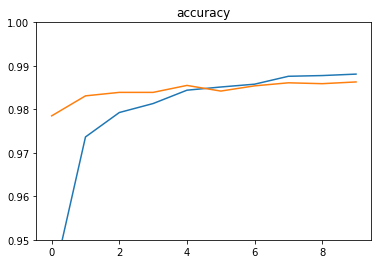

<Figure size 432x288 with 0 Axes>

In [21]:
plot_accuracy(history_do, miny=0.95)